# <center>Individual risk models</center>
Total claims
\begin{equation}
S = \sum\limits_{i=1}^n X_i
\end{equation}

mean total claims
\begin{equation}
\mathbb{E}[S] = \sum\limits_{i=1}^n \mathbb{E}[X_i]
\end{equation}

if $X_1,\ldots,X_n$ are i.i.d
\begin{equation}
\mathbb{E}[S] = n \mathbb{E}[X] = n \mu
\end{equation}

net premium
\begin{equation}
P = \frac{1}{n}\mathbb{E}[S]
\end{equation}

### 1. Example
Consider $X_i \rightsquigarrow LN( \mu, \sigma )$ then
\begin{equation}
\mathbb{E}[X] = \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}

\begin{equation}
\mathbb{E}[S] = n \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}

\begin{equation}
P = \mathbb{E}[X]
\end{equation}

In [3]:
# Numerical python library, importing all
import numpy as np

# Scientific computing python library, importing linalg sections
from scipy import linalg

# Plotting library
from matplotlib import pyplot as plt

In [4]:
n = 350
u = 6.5
s = 1.5
EX = np.exp( 6.5 + 0.5 * 1.5**2 )
print( 'Mean claim E[X]: ', EX )
ES = n * EX
print( 'Mean total claim E[S]: ', ES )
P = ES / n
print( 'Net premium P: ', P )

Mean claim E[X]:  2048.780465020098
Mean total claim E[S]:  717073.1627570343
Net premium P:  2048.780465020098


## Valuation with simulations

In [5]:
m = 500
S = np.zeros( m )

for i in range( 0, m ): 
    S[i] = np.sum( np.random.lognormal( mean = u, sigma = s, size = n ) )

ES = np.mean( S )
print( 'Mean total claim E[S]: ', ES )

Mean total claim E[S]:  714653.9714325421


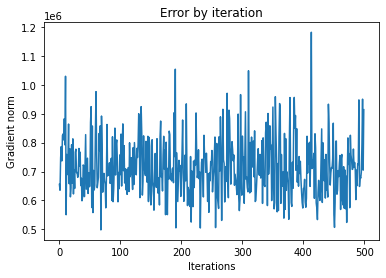

In [6]:
plt.xlabel( 'Iterations' )
plt.ylabel( 'Gradient norm' )
plt.title( 'Error by iteration' )
# plt.yscale( 'log' )
plt.plot( S )

---
# Colective risk model

\begin{equation}
S = \sum\limits_{i=1}^N X_i
\end{equation}

\begin{equation}
\mathbb{E}[S] = \sum\limits_{n=0}^\infty \sum\limits_{i=1}^n \mathbb{E}[X_i] P( N = n )
\end{equation}

\begin{equation}
\mathbb{E}[S] = \sum\limits_{n=0}^\infty n \mathbb{E}[X] P( N = n ) = \mathbb{E}[N] \mathbb{E}[X]
\end{equation}

### 2. Example
Consider $X_i \rightsquigarrow LN( \mu, \sigma )$ and $N \rightsquigarrow Pois( \lambda )$ then
\begin{equation}
\mathbb{E}[X] = \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}

\begin{equation}
\mathbb{E}[S] = \mathbb{E}[N] \mathbb{E}[X] = \lambda \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}


In [7]:
n = 350
lamb = 200
u = 6.5
s = 1.5

EX = np.exp( u + 0.5 * s**2 )
EN = lamb

print( 'Mean claim E[X]: ', EX )
print( 'Mean number claim E[N]: ', EN )

ES = EN * EX 
print( 'Mean total claim E[S]: ', ES )
P = ES / n
print( 'Net premium P: ', P )

Mean claim E[X]:  2048.780465020098
Mean number claim E[N]:  200
Mean total claim E[S]:  409756.0930040196
Net premium P:  1170.7316942971988


## Valuation with simulations

In [8]:
m = 1000
S = np.zeros( m )

for i in range( 0, m ): 
    N = np.random.poisson( lam = lamb, size = 1 )
    S[i] = np.sum( np.random.lognormal( mean = u, sigma = s, size = N ) )

ES = np.mean( S )
print( 'Mean total claim E[S]: ', ES )

P = ES / n
print( 'Net premium P: ', P )

Mean total claim E[S]:  411597.4877248944
Net premium P:  1175.992822071127


Text(0.5, 1.0, 'My Very Own Histogram')

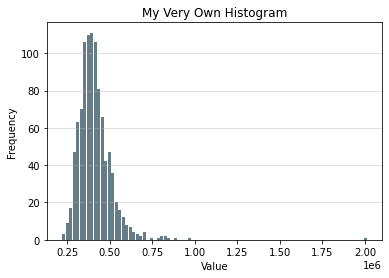

In [10]:
nn, bins, patches = plt.hist( x = S, bins = 'auto', color='#254455', alpha = 0.7, rwidth = 0.85 )
plt.grid( axis = 'y', alpha = 0.5 )
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')